In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dg_intensity = np.load("C:/Users/owner/Documents/GitHub/Scalable-Hyp-3D-Imaging/calibration/intensity_dg.npy")

In [3]:
dg_intensity_21 = dg_intensity[2]

In [4]:
white_box_p = np.array([0.000045513,0.00011785,0.000450827,0.00192969,0.00646062,0.0121806,0.00988155,
0.00384551,0.0012909,0.00158269,0.00342962,0.0048454,0.00536611,0.00552526,0.00547096,0.00517708,
0.00465882,0.00409307,0.00335211,0.00229322,0.00148828,0.00177185,0.0041034,0.00914754,0.00845859,
0.00202013,0.00049117,0.000153816,0.0000572871
])

In [5]:
white_box_p.shape

(29,)

In [6]:
white_box_p_21 = white_box_p[2:-2]

In [7]:
white_box_p_21.shape

(25,)

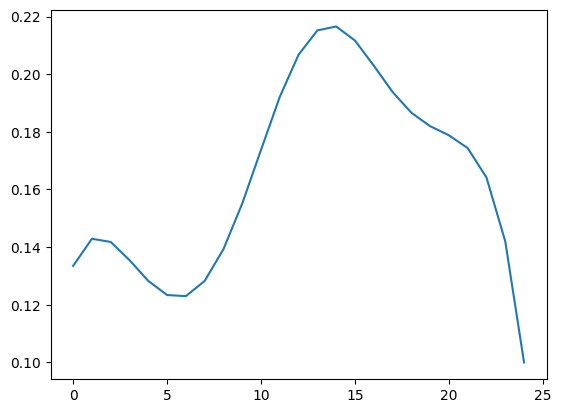

In [8]:
plt.plot(dg_intensity_21)

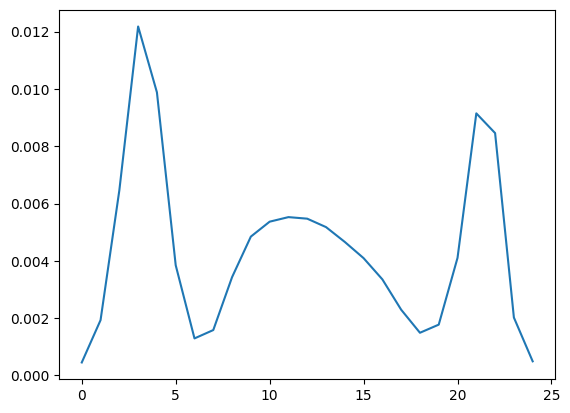

In [9]:
plt.plot(white_box_p_21)

In [10]:
PE = white_box_p_21[3::5]

In [11]:
PE

array([0.0121806 , 0.00342962, 0.00517708, 0.00148828, 0.00202013])

In [12]:
import cv2

In [13]:
wvl = torch.linspace(450, 650, 5).type(torch.int)

img_m0 = np.zeros(shape=(5, 768,1024,3))
for i in range(5):
    img = cv2.imread(f"C:/Users/owner/Documents/GitHub/Scalable-Hyp-3D-Imaging/calibration/crf_experiment_m0/{wvl[i]}nm.png", -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/65535.
    img_m0[i]= img

In [14]:
img_m0.shape

(5, 768, 1024, 3)

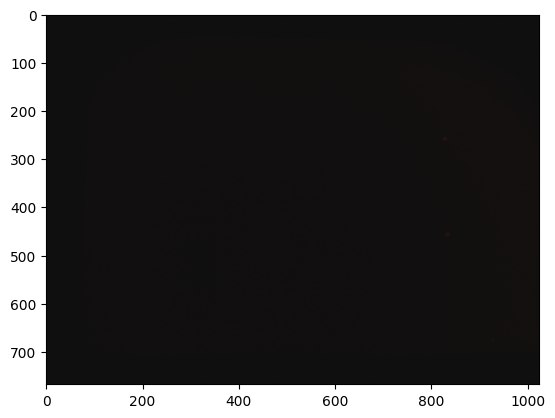

In [15]:
plt.imshow(img)

In [16]:
img_m0.shape # 450nm ~ 650nm 까지의 image가 담김

(5, 768, 1024, 3)

In [17]:
dat_from_white = img_m0[:,250:270,818:838]
dat_from_black = img[210:230,818:838]

dat_from_white_mean = dat_from_white.mean(axis=1).mean(axis = 1)
dat_from_black_mean = dat_from_black.mean(axis=0).mean(axis = 0)

In [18]:
dat_from_black_mean[:] = 15/ 255.

In [19]:
dat_white_final = dat_from_white_mean - dat_from_black_mean

In [20]:
dat_white_final.shape

(5, 3)

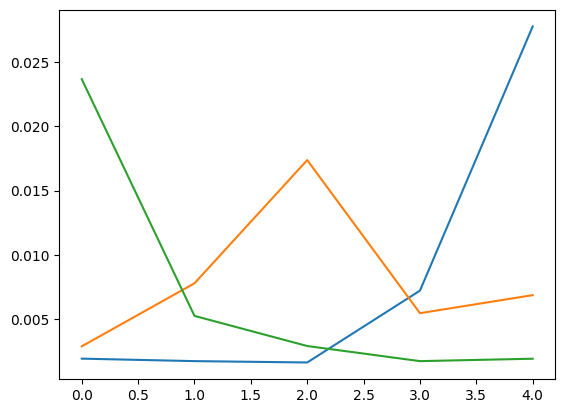

In [21]:
plt.figure()
plt.plot(dat_white_final)
# plt.plot(dat_from_black_mean)

In [22]:
crf = np.zeros(shape=(5, 3))

In [23]:
import torch
wvl = torch.linspace(450, 650, 5)

In [24]:
wvl

tensor([450., 500., 550., 600., 650.])

In [25]:
for i in range(3):
    for j in range(5):
        crf[j, i] = (dat_white_final[j,i]) / PE[j]

In [26]:
crf.shape

(5, 3)

In [27]:
import matplotlib.pyplot as plt

In [28]:
dat_white_final

array([[0.0019263 , 0.00288579, 0.02366369],
       [0.00173342, 0.00778698, 0.00525093],
       [0.00162783, 0.01737026, 0.00290837],
       [0.0072163 , 0.00546273, 0.0017322 ],
       [0.02776287, 0.00686534, 0.0019202 ]])

In [29]:
PE

array([0.0121806 , 0.00342962, 0.00517708, 0.00148828, 0.00202013])

In [41]:
dat_white_final[0,2] / PE[-2]

15.90002631050394

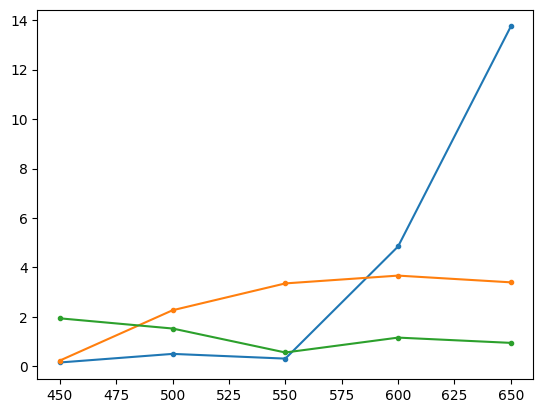

In [30]:
plt.plot(wvl, crf, '.-')

In [43]:
crf_dispersion = np.load('./crf_dispersion.npy')

In [48]:
crf_dispersion_50 = crf_dispersion[3::5]

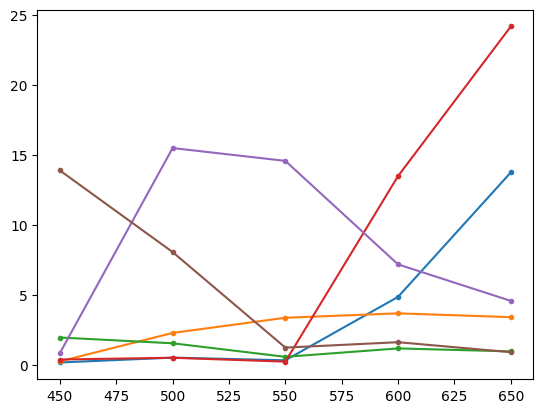

In [51]:
plt.plot(wvl, crf, '.-')
plt.plot(wvl, crf_dispersion_50, '.-')